## Data Understanding

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 

In [2]:
df_ = pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2009-2010")

In [3]:
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.shape

(525461, 8)

In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
# What is the number of unique products?
df["Description"].nunique()

4681

In [7]:
# How many of which products do you have?
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    3549
REGENCY CAKESTAND 3 TIER              2212
STRAWBERRY CERAMIC TRINKET BOX        1843
PACK OF 72 RETRO SPOT CAKE CASES      1466
ASSORTED COLOUR BIRD ORNAMENT         1457
Name: Description, dtype: int64

In [8]:
# Which is the most ordered product?
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925


In [9]:
# How many invoices have been issued?
df["Invoice"].nunique()

28816

In [10]:
df[df["Invoice"].str.contains("C", na=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [11]:
df[df["Invoice"].str.contains("C", na=False)].shape

(10206, 8)

In [12]:
df = df[~df["Invoice"].str.contains("C", na=False)]

In [13]:
df[df["Invoice"].str.contains("C", na=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [14]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [15]:
# What are the most expensive products)
df.sort_values("Price" , ascending= False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom,25111.09
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom,10953.50
135015,502265,M,Manual,1,2010-03-23 15:28:00,10953.50,NaN,United Kingdom,10953.50
342147,522796,M,Manual,1,2010-09-16 15:12:00,10468.80,NaN,United Kingdom,10468.80


In [16]:
# How many orders came from which country?
df["Country"].value_counts()

United Kingdom          477058
EIRE                      9460
Germany                   7661
France                    5532
Netherlands               2730
Spain                     1235
Switzerland               1170
Portugal                  1061
Belgium                   1038
Sweden                     887
Channel Islands            821
Italy                      710
Australia                  630
Cyprus                     541
Austria                    524
Greece                     512
Denmark                    418
United Arab Emirates       399
Norway                     365
Finland                    347
Unspecified                306
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
RSA                        110
Bahrain                    106
Canada                      77
Thailand                    76
Hong Kong                   74
Israel  

In [17]:
# How much income did countries generate?
df.groupby("Country").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).head()

,TotalPrice
Country,
United Kingdom,8709203.673
EIRE,380977.820
Netherlands,268786.000
Germany,202395.321
France,147211.490


In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(407695, 9)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,407695.0,13.586686,96.842229,1.0,2.00,5.00,12.00,19152.0
Price,407695.0,3.294188,34.756655,0.0,1.25,1.95,3.75,10953.5
Customer ID,407695.0,15368.504107,1679.795700,12346.0,13997.00,15321.00,16812.00,18287.0
TotalPrice,407695.0,21.663261,77.147356,0.0,4.95,11.90,19.50,15818.4


In [21]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,407695.0,13.586686,96.842229,1.0,1.00,1.00,1.00,2.00,5.00,12.00,24.00,36.0,144.00,19152.0
Price,407695.0,3.294188,34.756655,0.0,0.29,0.42,0.65,1.25,1.95,3.75,6.75,8.5,14.95,10953.5
Customer ID,407695.0,15368.504107,1679.795700,12346.0,12435.00,12731.00,13044.00,13997.00,15321.00,16812.00,17706.00,17913.0,18196.00,18287.0
TotalPrice,407695.0,21.663261,77.147356,0.0,0.65,1.25,2.10,4.95,11.90,19.50,35.70,67.5,201.60,15818.4


In [22]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [23]:
###############################################################
# Calculating RFM Metrics
###############################################################

# Recency, Frequency, Monetary


# Today's date - Last purchase

print(df["InvoiceDate"].max())


2010-12-09 20:01:00


In [24]:
# Calculating RFM Metrics

# Today's date - Last purchase

print(df["InvoiceDate"].max())

2010-12-09 20:01:00


In [32]:
today_date = dt.datetime(2010, 12, 11)
print(today_date)

2010-12-11 00:00:00


In [33]:
df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'Invoice': lambda num: len(num),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()}).head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,165,33,372.86
12347.0,3,71,1323.32
12348.0,74,20,222.16
12349.0,43,102,2671.14
12351.0,11,21,300.93


In [35]:
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'Invoice': lambda num: len(num),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})
rfm.head ()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,165,33,372.86
12347.0,3,71,1323.32
12348.0,74,20,222.16
12349.0,43,102,2671.14
12351.0,11,21,300.93


In [36]:
rfm.columns

Index(['InvoiceDate', 'Invoice', 'TotalPrice'], dtype='object')

In [37]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)] # hatali satin almalar var.

rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,165,33,372.86
12347.0,3,71,1323.32
12348.0,74,20,222.16
12349.0,43,102,2671.14
12351.0,11,21,300.93


In [38]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

In [39]:
rfm["FrequenyScore"] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])

In [40]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [41]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequenyScore,MonetaryScore
Customer ID,,,,,,
12346.0,165,33,372.86,2,3,2
12347.0,3,71,1323.32,5,4,4
12348.0,74,20,222.16,2,2,1
12349.0,43,102,2671.14,3,4,5
12351.0,11,21,300.93,5,2,2


In [42]:
# Calculating RFM Scores

rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])


rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

In [43]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequenyScore,MonetaryScore,FrequencyScore,RFM_SCORE
Customer ID,,,,,,,,
12346.0,165,33,372.86,2,3,2,3,232
12347.0,3,71,1323.32,5,4,4,4,544
12348.0,74,20,222.16,2,2,1,2,221
12349.0,43,102,2671.14,3,4,5,4,345
12351.0,11,21,300.93,5,2,2,2,522


In [44]:
rfm[rfm["RFM_SCORE"] == "555"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequenyScore,MonetaryScore,FrequencyScore,RFM_SCORE
Customer ID,,,,,,,,
12415.0,11,212,19543.84,5,5,5,5,555
12431.0,9,170,4370.52,5,5,5,5,555
12433.0,2,286,7205.39,5,5,5,5,555
12471.0,10,678,20139.74,5,5,5,5,555
12472.0,5,572,11308.48,5,5,5,5,555


In [45]:
rfm["RecencyScore"].value_counts()

5    906
1    855
4    853
3    850
2    848
Name: RecencyScore, dtype: int64

In [46]:
rfm["RFM_SCORE"].value_counts()

555    301
111    259
455    158
122    138
211    130
      ... 
352      2
515      1
152      1
541      1
141      1
Name: RFM_SCORE, Length: 118, dtype: int64

In [49]:
# Naming & Analysing RFM Segments

# RFM isimlendirmesi
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}



In [48]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequenyScore,MonetaryScore,FrequencyScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,
12346.0,165,33,372.86,2,3,2,3,232,23
12347.0,3,71,1323.32,5,4,4,4,544,54
12348.0,74,20,222.16,2,2,1,2,221,22
12349.0,43,102,2671.14,3,4,5,4,345,34
12351.0,11,21,300.93,5,2,2,2,522,52


In [50]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
df[["Customer ID"]].nunique()

Customer ID    4314
dtype: int64

In [51]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequenyScore,MonetaryScore,FrequencyScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,
12346.0,165,33,372.86,2,3,2,3,232,At_Risk
12347.0,3,71,1323.32,5,4,4,4,544,Champions
12348.0,74,20,222.16,2,2,1,2,221,Hibernating
12349.0,43,102,2671.14,3,4,5,4,345,Loyal_Customers
12351.0,11,21,300.93,5,2,2,2,522,Potential_Loyalists


In [52]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency         Frequency           Monetary      
                           mean count        mean count         mean count
Segment                                                                   
About_to_Sleep        53.543605   344   16.107558   344   447.839826   344
At_Risk              165.055459   577   59.564991   577  1180.625170   577
Cant_Loose           128.868687    99  220.646465    99  3002.426980    99
Champions              7.039557   632  273.354430   632  6964.077188   632
Hibernating          206.061344  1027   14.516066  1027   461.186768  1027
Loyal_Customers       37.401035   773  168.276843   773  2662.046864   773
Need_Attention        53.680723   166   45.271084   166   935.626627   166
New_Customers          7.757576    66    7.818182    66   482.087121    66
Potential_Loyalists   18.439922   516   37.203488   516  1024.276880   516
Promising             24.991071   112    8.616071   112   456.508214   112

In [53]:
rfm[rfm["Segment"] == "Need_Attention"].head()


,Recency,Frequency,Monetary,RecencyScore,FrequenyScore,MonetaryScore,FrequencyScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,
12374.0,57,50,2246.29,3,3,5,3,335,Need_Attention
12379.0,58,41,767.98,3,3,3,3,333,Need_Attention
12389.0,38,49,1433.33,3,3,4,3,334,Need_Attention
12458.0,63,46,830.09,3,3,3,3,333,Need_Attention
12486.0,67,49,1037.28,3,3,4,3,334,Need_Attention


 ## CLUSTER

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [55]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequenyScore,MonetaryScore,FrequencyScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,
12346.0,165,33,372.86,2,3,2,3,232,At_Risk
12347.0,3,71,1323.32,5,4,4,4,544,Champions
12348.0,74,20,222.16,2,2,1,2,221,Hibernating
12349.0,43,102,2671.14,3,4,5,4,345,Loyal_Customers
12351.0,11,21,300.93,5,2,2,2,522,Potential_Loyalists


In [56]:
segment_data = rfm[["RecencyScore", "FrequencyScore", "MonetaryScore"]]

In [57]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,
12346.0,2,3,2
12347.0,5,4,4
12348.0,2,2,1
12349.0,3,4,5
12351.0,5,2,2


In [59]:

#  Optimal Number of Clusters

kmeans = KMeans()
ssd = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(segment_data)
    ssd.append(kmeans.inertia_)


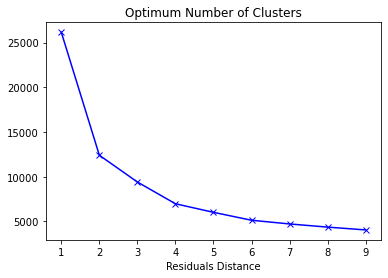

In [60]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance")
plt.title("Optimum Number of Clusters")
plt.show()

In [82]:
plt.show()

# Final Clusters

kmeans = KMeans(n_clusters=5).fit(segment_data)
segment_data.loc[:, "clusters"] = kmeans.labels_

/var/folders/jr/dhqrm51x5xb1bm5fcwng1sj80000gn/T/ipykernel_6139/4233263500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data.loc[:, "clusters"] = kmeans.labels_


In [64]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,clusters
Customer ID,,,,
12346.0,2,3,2,1
12347.0,5,4,4,2
12348.0,2,2,1,1
12349.0,3,4,5,4
12351.0,5,2,2,3


In [65]:
segment_data["clusters"].value_counts()

1    1121
2    1052
4     873
0     647
3     619
Name: clusters, dtype: int64

In [66]:
kmeans = KMeans(n_clusters=7).fit(segment_data)
segment_data["clusters"] = kmeans.labels_

segment_data["clusters"].value_counts()


/var/folders/jr/dhqrm51x5xb1bm5fcwng1sj80000gn/T/ipykernel_6139/500206742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data["clusters"] = kmeans.labels_


3    1052
6     647
4     621
0     619
1     504
2     500
5     369
Name: clusters, dtype: int64

In [67]:

kmeans = KMeans(n_clusters=5).fit(segment_data)
segment_data["clusters"] = kmeans.labels_

segment_data["clusters"].value_counts()

/var/folders/jr/dhqrm51x5xb1bm5fcwng1sj80000gn/T/ipykernel_6139/1862301408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data["clusters"] = kmeans.labels_


1    1121
3    1052
2    1016
4     619
0     504
Name: clusters, dtype: int64

In [68]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequenyScore,MonetaryScore,FrequencyScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,
12346.0,165,33,372.86,2,3,2,3,232,At_Risk
12347.0,3,71,1323.32,5,4,4,4,544,Champions
12348.0,74,20,222.16,2,2,1,2,221,Hibernating
12349.0,43,102,2671.14,3,4,5,4,345,Loyal_Customers
12351.0,11,21,300.93,5,2,2,2,522,Potential_Loyalists


In [69]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,clusters
Customer ID,,,,
12346.0,2,3,2,1
12347.0,5,4,4,3
12348.0,2,2,1,1
12349.0,3,4,5,0
12351.0,5,2,2,4


In [70]:
# RFM & K-Means Joining..

segmentation = rfm[["Segment"]].merge(segment_data, on="Customer ID")

In [71]:
segmentation.head()

,Segment,RecencyScore,FrequencyScore,MonetaryScore,clusters
Customer ID,,,,,
12346.0,At_Risk,2,3,2,1
12347.0,Champions,5,4,4,3
12348.0,Hibernating,2,2,1,1
12349.0,Loyal_Customers,3,4,5,0
12351.0,Potential_Loyalists,5,2,2,4


In [72]:
segmentation.dtypes

Segment             object
RecencyScore      category
FrequencyScore    category
MonetaryScore     category
clusters             int32
dtype: object

In [73]:
pd.crosstab(segmentation["Segment"],segmentation["clusters"])

clusters,0,1,2,3,4
Segment,,,,,
About_to_Sleep,2,0,58,0,284
At_Risk,119,136,322,0,0
Cant_Loose,94,0,5,0,0
Champions,0,0,54,578,0
Hibernating,0,985,42,0,0
Loyal_Customers,242,0,84,447,0
Need_Attention,47,0,107,0,12
New_Customers,0,0,10,0,56
Potential_Loyalists,0,0,323,27,166


In [74]:
segmentation.groupby("Segment").agg({"clusters": "count"}).head()

,clusters
Segment,
About_to_Sleep,344
At_Risk,577
Cant_Loose,99
Champions,632
Hibernating,1027


In [75]:
segmentation["RecencyScore"] = segmentation["RecencyScore"].astype(int)
segmentation["FrequencyScore"] = segmentation["FrequencyScore"].astype(int)
segmentation["MonetaryScore"] = segmentation["MonetaryScore"].astype(int)

In [76]:
segmentation.groupby("clusters").agg({"RecencyScore":["count","median"],
                                      "FrequencyScore":["median"],
                                      "MonetaryScore":["median","sum"]})

RecencyScore        FrequencyScore MonetaryScore      
                count median         median        median   sum
clusters                                                       
0                 504    3.0            4.0           4.0  2097
1                1121    1.0            2.0           1.0  1836
2                1016    3.0            3.0           3.0  3185
3                1052    5.0            5.0           5.0  4830
4                 619    4.0            1.0           2.0   988